<a href="https://colab.research.google.com/github/tjy2202/Personal_training/blob/main/Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#github 컴퓨터 연동
cmd -> git 입력시 상ㅇ 가능 확인
git config --global user.name tjy2202 #컴퓨터에서 동일 옵션 사용하도록 셋팅
git config --global user.email tjy2202@naver.com
0. cd C:\Github_Workspace
1. git init 

git clone https://github.com/tjy2202/Home.git #파일 만들어짐
cd tjy2202.github.io
git add test.txt
2. git add . 
git commit -m "2020-07-02 00:08" #나중에 롤백하기 위한 목적의 스냅샷 형태로 찍어 놓는 것
git push #깃허브에 실제로 넣는 명령어
4. git push -u origin master #or main
asdasd

## 깃블로그 예시 : https://github.com/subinium

---
title : "Basic of Evaluation"
category :
  - ML
tag :
  - data
  - Evaluation
  - basic
  - accuracy
  - confusion_matrix
  - precision
  - recall
  - f1
  - roc auc
  - 측정법
  - 척도
  - 재현율
  - 정확도
sidebar_main : true
author_profile : true
use_math : true
header:
  teaser : https://i.imgur.com/AwkwrNc.jpg
  overlay_image : https://i.imgur.com/AwkwrNc.jpg
published : true
---
머신러닝, 지표부터 차근차근

공부할 때마다 혼돈이 와서 이번 기회에 확실하게 하자라는 마음으로 정리해봤습니다. 글을 쓰거나 강의를 찍으면 저도 정리되서 좋은 것 같습니다.

### 머신러닝 평가 지표

머신러닝에서는 다양한 방법으로 모델의 성능을 평가할 수 있습니다. 이번에 살펴볼 지표는 다음과 같습니다.

- 정확도 (Accuracy)
- 오차행렬 (Confusion Matrix)
- 정밀도 (Precision)
- 재현율 (Recall)
- F1 스코어
- ROC AUC

이 지표들은 이진/다중 분류 모두에 적용되는 지표지만, 특히 이진 분류에서 더욱 중요하게 강조하는 지표입니다. 하나하나씩 살펴보도록 하겠습니다.

## 1. 정확도 (Accuracy)

### 설명

**정확도** 는 **실제 데이터에서 예측 데이터가 얼마나 같은지** 를 판단하는 지표입니다.

**정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수**

가장 직관적인 모델 예측 성능을 나타내는 평가 지표입니다. 예를 들면 다음과 같습니다.

> 너 OX문제 몇 개 맞췄어? 10개 중에 8개 맞췄어.

대부분의 사람들이 들었을 때, 어느 정도 수긍할 수 있는 수치입니다.
하지만 데이터 과학을 하시는 분이라면, 통계를 다시 한 번 살펴볼 수 있어야합니다.

제가 다닌 고등학교에서 학교의 여성비율은 133명 중에 7명이 여자였습니다.
이때 이름만 듣고 남여를 맞추는 문제를 한다고 가정할 때, 모두 남자로만 찍어도 95% 정도의 정확도를 가집니다.

머신러닝, 캐글에서 가장 유명한 예시 중 하나인 **타이타닉에서 생존자 예측** 문제만 살펴봐도 비슷합니다.
타이타닉에서 생존자의 대다수는 여성입니다. 이때 머신러닝 알고리즘을 사용하지 않더라도 `여성=생존자`와 같이 코드를 작성하더라도 70%이상의 정확도를 가지는 것을 확인할 수 있습니다.

불균형이 심할수록, 모델의 성능을 판단하기에 좋은 지표는 아닙니다.
이런 한계점을 극복하기 위해 통계 선지자 분들은 많은 지표를 만들었습니다.
우선 지표를 설명하기 위해 필요한 오차행렬을 알아봅시다.

### Code

저는 프로그래밍을 하면서 가장 어려운 부분은 사람들이 사용하는 암묵적으로 사용하는 변수명이었습니다.

> 합은 `sum`, 리턴값은 `ret`과 같이 사용하는 것을 의미합니다.

그래서 사이킷런(Scikit-Learn 라이브러리)을 기준으로 어떤 식으로 변수명을 정하는지 설명하고자 합니다.
제가 읽은 캐글 코드와 책들을 바탕으로 조금 적어봤습니다.

분류기(classifier)는 보통 `clf`라는 명칭으로 객체를 만듭니다.
예를 들면 logistic regression이라면 첫 자와 clf를 합쳐 `lr_clf`와 같이 많이 사용합니다.

- Train 데이터는 `X_train`과 `y_train`으로 입력값과 타겟값을 분류합니다.
- Test 데이터는 `X_test`와 `y_test`로 입력값과 타겟값을 분류합니다.

X는 대문자로 y는 소문자로 씁니다.

- 보통 예측값(prediction)은 `pred`를 사용합니다.

결론적으로 정확도를 측정하는 `accuracy_score()`는 다음과 같이 사용합니다.
사용 전에 `sklearn.metrics`에서 불러오는 것을 잊지맙시다.
같은 수의 정답과 예측값을 비교해 정확도를 측정합니다.

``` python
from sklearn.metrics import accuracy_score
clf = MyClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(y_test, pred)
```

## 2. 오차행렬

### 설명

이진 분류에서 성능 지표로 잘 활용되는 **오차행렬(Confusion Matrix, 혼동행렬)** 은 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여주는 지표입니다. 어떠한 유형의 예측 오류가 발생하는지를 확인할 수 있습니다.

OX문제를 생각해보겠습니다. 여러분이 정답을 맞추는 케이스는 다음과 같습니다.

- 정답이 O이고, 여러분의 답안이 O인 케이스
- 정답이 X고, 여러분의 답안이 X인 케이스

그렇다면 여러분이 정답을 틀리는 케이스는 다음과 같습니다.

- 정답이 O이고, 여러분의 답안이 X인 케이스
- 정답이 X고, 여러분의 답안이 O인 케이스

이렇게 이진 분류 문제에서 케이스는 총 4가지가 나옵니다. (클래스가 N개인 다중 분류에서는 N^2개의 케이스가 나옵니다.) 그리고 모든 예측은 반드시 이 4가지 케이스에 포함됩니다.

그렇다면 이를 값이 1일 때를 Positive, 0일 때를 Negative라고 생각하면 다음과 같이 행렬로 표현할 수 있습니다. (음성과 양성은 사용자에 따라 다르게 정의할 수 있습니다.)

보통 중점적으로 찾아야 하는 매우 적은 수의 결괏값에 Positive(1)을 설정하고, 그렇지 않은 경우 Negative(1)을 부여하는 경우가 많습니다. 질병, 사기 등의 케이스에서 병에 걸린 상태, 사기 행위를 1로 설정하고 정상 케이스를 0으로 두는 것입니다.

<figure>
    <img src = "https://i.imgur.com/IUrBHiD.png">
    <figcaption>오차행렬</figcaption>
</figure>

T와 F는 각각 True와 False로 실제 값과 예측 값이 같은지를 비교합니다.
뒤의 N, P는 음성(Negative), 양성(Positive)를 의미하고, 이는 예측 값 기준입니다.

표와 각각이 의미하는 알파벳이 무엇을 의미하는지 아는 것이 가장 중요합니다.

그렇다면 정확도도 다시 정의할 수 있습니다. 정확도를 식으로 적어보면 다음과 같습니다.

$$Accuracy = \frac{TN+TP}{TN+FP+FN+TP}$$

이제 이 표를 가지고 나머지 지표들도 살펴보겠습니다.

### Code

이번에도 `sklearn.metrics` 에서 함수를 가져옵니다.
`confusion_matrix()`는 다음과 같이 사용할 수 있습니다. 결과에서 나오는 배열의 형태는 위의 그림과 같습니다. 행은 실제 클래스, 열은 예측 클래스를 나타냅니다.

``` python
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)
```

133명 중, 여학생이 7명인 케이스에 대해 모두 남자라고 예측한다면 다음과 같은 결과가 나옵니다.

```
array([[126, 0],    
    [7,0]], dtype=int64)
```

## 3. 정밀도와 재현율

### 설명

불균형 데이터셋에서는 **정밀도(Precision)** 와 **재현율(Recall)** 을 많이 사용합니다. 예측 성능에 좀 더 초점을 맞춘 평가 지표입니다. 우선 공식으로 살펴보겠습니다.

$$Precision = \frac{TP}{FP+TP}$$

$$Recall = \frac{TP}{FN+TP}$$

식을 읽어보면 다음과 같습니다.

- 정확도는 Positive로 예측한 값들 중에 실제로 Positive한 값의 비율
- 재현율은 실제 값이 Positive인 값들 중에 예측을 Positive로 한 값의 비율

정확도은 양성 예측도, 재현율은 민감도(Sensitivity), TPR(True Positive Rate)라고도 불립니다.

이 지표들은 특정 업무에 따라 중요한 지표가 될 수 있습니다. 케이스로 살펴봅시다.

### Case Study

재현율의 경우 다음과 같은 상황을 생각해보겠습니다. 암 판단 모델이 있습니다. 가장 최악의 경우는 무엇일까요?

1. 암환자에게 암을 예측한 경우
2. 암환자가 아닌 사람에게 암을 예측한 경우
3. 암환자에게 암이 아니라고 예측한 경우
4. 암환자가 아닌 사람에게 암이 아니라고 예측한 경우

1번과 4번은 제대로 예측하였고 좋은 대처를 할 수 있습니다. 하지만 2, 3번의 경우에는 분명 힘든 상황이 발생할 수 있습니다. 가장 최악은 3번의 경우입니다. 모델의 판단 결과가 생명에 영향을 미칠 수 있는 상황이기 때문입니다.

이런 케이스의 경우, 재현율을 사용합니다. 실제 암인 환자 중에서 암을 예측한 확률을 구하는 것입니다.

그렇다면 정밀도는 어떤 케이스에서 중요할까요. 이번에는 스팸 메일 구분 모델이 있습니다. 가장 최악의 경우는 무엇일까요?

1. 스팸 메일을 스팸으로 예측한 경우
2. 정상 메일을 스팸으로 예측한 경우
3. 스팸 메일을 정상으로 예측한 경우
4. 정상 메일을 정상으로 예측한 경우

이번에도 1, 4는 좋습니다. 3번의 경우는 번거로움 정도가 있을 수 있습니다. 하지만 2번의 경우에는 정상적인 업무가 불가능합니다.

이런 케이스의 경우, 정밀도를 사용합니다. 스팸으로 예측한 확률 중, 실제 스팸인 확률을 구하는 것입니다.

결론적으로 정밀도와 재현율은 모두 TP를 높이는 데 초점을 둡니다. 하지막 재현율은 FN, 정밀도는 FP를 낮추는 데 초점을 둔다는 차이점이 있습니다.

가장 좋은 방향은 재현율과 정밀도 모두 높은 수치를 얻는 것입니다. 하지만 그것이 과연 가능할까요??

### 정밀도/재현율 Trade-off

분류하려는 업무의 특성에 따라 정밀도 또는 재현율을 강조하기 위한 방법 중 하나로 결정 임계값(Threshold)을 조정하는 방법이 있습니다. 하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기에 강제로 하나를 올리면, 하나는 떨어지기 쉽습니다. (마치 오버피팅같은 느낌입니다.)

이런 것을 정밀도/재현율의 트레이드오프라고 부릅니다.

> 머신러닝에서 가장 고민이 되는 부분은 이런 트레이트 오프인 것 같습니다. 오버피팅과 언더피팅, 정밀도와 재현율 등등 중도를 찾기 위해 가장 많은 시간이 소모되는 것 같습니다.

### 정밀도와 재현율의 거짓말

하지만 정밀도와 재현율도 여러분에게 혼란을 줄 수 있습니다. 다음과 같은 케이스를 살펴보겠습니다.

**정밀도가 100%??**

FP를 0으로 만들면 됩니다. 즉, 정확도가 99%인 스팸메일만 스팸으로 예측하면 됩니다.
그렇다면 식에 따라 정밀도는 100%가 됩니다.

**재현율이 100%??**

모든 환자를 암환자라고 예측하면 됩니다. 그렇다면 FN, 즉 암환자가 아니라고 한 케이스가 0이므로 무조건 재현율이 100%가 됩니다.

이렇게 임계치로 여러분을 속이기는 쉽습니다. 그렇다면 이런 극단적인 경우를 방지하기 위해 이 둘을 조합해서 지표를 만들어보겠습니다. 그것이 바로 F1 Score입니다.

넘어가기 전에 코드만 간략하게 소개하고 넘어가겠습니다.

### Code

각각은 `precision_score()`과 `recall_score()`으로 사용할 수 있습니다.
역시 `sklearn.matrics`에서 불러와서 사용합니다.

``` python
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
```

임계 값의 변경은 다음과 같은 과정을 거쳐야합니다.

1. 분류의 결과를 예측 값이 아닌 예측 확률 값을 변환
2. 원하는 임계 값으로 예측 확률 값을 예측 값으로 변환
3. 다시 오차 행렬에서 원하는 지표 사용

각각의 단계는 다음과 같은 함수를 이용하여 할 수 있습니다.

1. `predict_proba()`를 이용하여 예측 확률을 구합니다. 기존과 같은 포맷이지만 확률로 반환합니다.
2. `sklearn.preprocessing`에서 `Binarizer` 객체를 불러와, `fit_transform()`으로 원하는 임계값으로 예측 값을 만듭니다.

코드로 보면 다음과 같습니다.

``` python
from sklearn.preprocessing import Binarizer

pred_proba = clf.predict_proba(X_test)

# predict_proba는 첫 번째 칼럼에는 0인 확률, 두 번째 칼럼에는 1인 확률을 반환합니다.
# 각 행마다 확률의 합은 1이 되겠죠??
# 보다 필요한 값인 1인 확률만 따로 구해서 사용합니다.
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)

# threshold값보다 작으면 0, 크면 1을 반환
binarizer = Binarizer(threshold=1.5).fit(pred_proba_1)
custom_predict = binarizer.fit_transform(pred_proba_1)

# 원하는 지표 사용
accuracy = accuracy_score(y_test, custom_predict)
precision = precision_score(y_test, custom_predict)
recall = recall_score(y_test, custom_predict)
```

## 4. F1 스코어

### 설명

F1 Score는 정밀도와 재현율을 결합한 지표입니다. 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가집니다. F1 스코어의 공식은 다음과 같습니다.

$$F1 = \frac{2}{\frac{1}{recall} + \frac{1}{precision}} = 2 \times \frac{precision \cdot recall}{precision + recall}$$

정밀도와 재현율의 조화평균 입니다. F1 스코어의 최댓값이 1인 것도 쉽게 알 수 있습니다.

### Code

`sklearn.metrics`의 `f1_score`함수를 사용하면 됩니다.

``` python
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
```

## 5. ROC 곡선과 AUC

### 설명

이제 마지막으로 ROC곡선과 이에 기반한 AUC 스코어를 살펴보겠습니다.

**ROC곡선** 은 **Receiver Operation Characteristic Curve** 입니다. 2차대전 때 통신 장비 성능 평가를 위해 고안된 수치로, 한국어로는 수신자 판단 곡선이라고 합니다.

의학 분야에서 많이 사용하나, 머신러닝에서 지표로 많이 사용됩니다.
ROC 곡선은 FPR(X축)과 TPR(Y축)의 관계를 그린 곡선입니다.

- FPR : False Positive Rate
- TPR : True Positive Rate (재현율)

TPR은 이전에 봤던 재현율(민감도)입니다. 이와 대응하는 지표로 TNR이 있습니다. 이는 특이성(Specificity)라고 불립니다.

특이성은 실제값 Negative가 정확히 예측돼야 하는 수준을 의미합니다. 수식으로 쓰면 다음과 같습니다.

$$TNR = \frac{TN}{FP+TN}$$

그리고 이제 ROC에 사용할 FPR은 다음과 같습니다.

$$FPR = \frac{FP}{FP+TN} = 1 - TNR$$

ROC 곡선의 예시를 보고 더 이야기해보겠습니다.

<figure>
    <img src = "https://images.slideplayer.com/32/9873965/slides/slide_18.jpg">
    <figcaption>Example of ROC-AUC </figcaption>
</figure>

가운데 직선은 일반적인 수준(동전 던지기: 확률 50% 랜덤)의 분류 에서 ROC 곡선입니다. ROC 곡선이 직선에 가까울 수록 성능이 떨어지는 것이고, 멀어질수록 성능이 뛰어난 것입니다. 각각은 임계값을 변경하여 다음과 같은 그래프를 만듭니다.

결론적으로 아래에 있는 면적 AUC(Area Under Curve)가 클수록 좋은 값입니다. 대부분의 분류 문제는 최소 0.5 값을 가집니다. 최대는 1로 사각형 전체일때 가능합니다.

### Code

`sklearn.metrics`의 `roc_auc_score`함수를 사용하면 됩니다.

``` python
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred)
```

## Reference

- 파이썬 머신러닝 완벽 가이드, 권철민 저, 위키북스

## 피드백 내용

In [ ]:
#html은 일종의 마크다운 언어
import pandas as pd

!pip install pyreadstat #spss 파일을 읽기 위한 pyreadstat install
df_sas = pd.read_sas("d:/r_class/survey7b.dat", format="sas7bdat") #sas 파일
df_spss = pd.read_spss("d:/r_class/survey_h.sav") #spss 파일

In [ ]:
#2775번

y = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
for i in range(3):
  x = y ## x가 y의 주소를 참조한 것이므로 x를 바꾸면 y의 값도 변함!
  x[1] += 999

  print(i+1,x)

y = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
for i in range(3):
  x = y.copy() ### 차이점???
  x[1] += 999

  print(i+1,x)

1 [1, 1001, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
2 [1, 2000, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
3 [1, 2999, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
1 [1, 1001, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
2 [1, 1001, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
3 [1, 1001, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


## **1. Python**

### **ㄱ. Google Colab**

In [ ]:
import platform
platform.platform() #플랫폼확인
# 'Linux-4.19.104+-x86_64-with-Ubuntu-18.04-bionic'

!cat /etc/issue.net #운영체제 확인
!cat /proc/cpuinfo #CPU사양 확인
!cat /proc/meminfo #메모리 사양 확인
!df -h #디스크 사양 확인
!python --version #파이썬 버전 확인
!nvidia-smi #런타임 None : CPU, GPU, TPU

In [ ]:
# text가 들어있는 test 파일 생성
%%writefile test.txt 
text 

In [ ]:
!cat test.txt #test파일 보기

from google.colab import files
files.download('test.txt') #파일 다운로드
upload = files.upload() #파일 업로드
!ls #현재 지정된 파일목록 확인

#### 구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #구글 드라이브 연동 코드

!ls /content/drive #드라이브 확인

from google.colab import files #업로드
files.upload()

#### Jupyter Notebook

In [ ]:
help(min)

min?

li = ["one",'two','three']
li?
li.count?

def power(b,n):
  """b의 n승을 반환"""
  return pow(b,m)

power? #사용자 정의 함수의 정보 표기
power?? #사용자 정의 함수의 source 표기

#와일드 카드 매칭
*Error? #단어의 마지막 글자로 매칭하여 속성 찾기
str.*index*? #단어의 중간 글자로 매칭하여 속성 찾기

#매직명령어 Jupyter notebook환경에서 파이썬 파일 저장 및 실행
%%writefile test.py
print('hello cola') #파이썬 파일 생성

%run test.py #파이썬 파일 실행

%%timeit #코드실행시간 측정
%timeit li = [n ** n for n in range(10000)]
%%timeit 
li = []
for n in range(10000):
  li.append(n ** n)

In #이전 명령어 In[46]과 같이 슬라이싱 가능
Out#이전 명령어의 결과물 Out[46]과 같이 슬라이싱 가능

print(_) #이전 출력값
print(__) #
print(___) #
_40 #40번째 출력값 확인
%history -n 1-7 #1-7번까지의 입력 이력 살펴보기
%rerun #이전 입력 이력 다시 실행

#### 셀 명령어

In [ ]:
!ls #디렉토리 리스트 보기
!pwd #현재 경로 보기
!cd KCase.log/ $$ ls #디렉토리 변경 !cd
%cd sample_data/ #지속적인 디렉토리 변경 %cd
!echo "shell" #화면 출력
!mkdir tmp #디렉토리 생성
!cat README.md # !cat 파일 보기
!cp README.md tmp/ # !cp 디렉토리/파일 복사
!rm -r tmp # 디렉토리/파일 삭제

{}

#### 마크다운

1. 첫째
2. 둘째
* 1단계
  + 2단계
    - *3단계*

$a^b$


**bold**
__bold__
*itolic*

> 인용1
>> 인 용2
>>>인용3



링크

[google](https://www.google.com)

이미지

![이미지](https://www.google.com/images/branding.googlelogo/1x/googlelogo_color_272x92dp.png)

수평선




---

표




| C1 | C2 | C3  |
|:---|---:|:---:|
| D1 | D2 | D3 |

코드






`inline cod`

```phthon
def power(b,n)
 return pow(b,n)
```


### **ㄴ. python**

#### 변수, 자료형, 연산자

In [ ]:
a = 0b #2진수
a = 0o #8진수
a = 0x #16진수

complex(1.2) #복소수형 변환
str() #문자형 변환
eval('1+2') #문자형에 포함된 수식을 계산

set() #중복 제거
set().count() #요소 갯수
frozenset() #수정 불가능한 집합 자료형

chr() #정수를 문자로 변환
ord() #문자를 정수형으로 변환
bin() #정수를 2진수 문자열로 변환
oct() #정수를 8진수 문자열로 변환

divmod() #나눈 값과 나머지 쌍으로 반환
pow() #지수승의 값

#비트 연산
&, |, ^, ~
#멤버 연산
in, not in
#식별 연산
is, is not

#### 문자열

In [ ]:
#문자열 더하기
s1 = "동해물과"
s2 = "백두산이"
print(s1+ s2) #동해물과백두산이

#문자열 곱하기
s1 * 3 #동해물과동해물과동해물과

#인덱싱 s[1]
#슬라이싱 s[1:3]

s1.capitalize() #첫 문자가 대문자인 String
s1.casefold() #모든 문자가 소문자인 string
s1.count('s') #s의 갯수
s1.find('s') #rfind()
s1.index('s') #rindex() 찾고자 하는 문자의 인덱스 번호
s1.isalnum() #문자나 알파엣, 숫자가 1개 이상이면 True
s1.isalpha() #문자나 알파벳 1개 이상이면 True
s1.isdecimal() #문자열의 모든 문자가 10진수 문자열이면 True (isdigit, isidenifier, isspace, istitle, islower, isupper)

'_'.join(s1) #s1문자 사이 마다 _ 입력
s1.center(10) #너비 10에 해당하는 문자열 가운데 정렬 ljust, rjust
s1.title() #첫 문자가 대문자
s1.swapcase() #대문자는 소문자로 소문자는 대문자로
s1.strip() #공백제거 lstrip, rstrip
s1.partition('s') #문자 s 기준으로 분할
s1.rpartition('S') #마지막 문자 S를 기준으로 분할
s1.replace('s','t') #s를 t로 변환
s1.split('_',1) # 문자 _로 구분 한번만
s1.startswith() #endswith()
'123'.zfill(8) #문자열 s1에서 너비 8만큼 늘리고 비어있는 부분에 0으로 채워진 문자열 00000123 반환

print('a : %d, b : %s'%(2,'apple'))
print('%8s' % 'hello') #8칸중 hello입력
print('%8.2f' % 3.141592)
print('%-8.2f' % 3.141592) # -는 왼쪽정렬 의미
print('{n}'.format(n=2)) 
print('{0:~^8}'.format('hello')) # ~hello~~, > : 오른쪽 정렬, < : 왼쪽 정렬

s = 'apple'
n = 1
print(f'나는 {s}가 {n}개 있다.')
print(f'{'hello':~^8}')
print(f'{3.141592:8.2f}')

text = """동해물과 백두산이 마르고 닳도록
하느님이 보우하사 우리나라 만세."""
print(text)

#### 리스트, 튜플, 세트, 딕셔너리

In [ ]:
###리스트###
list = ([1,2,3,['one','two','three']])
list[3][0] # 'one'

list.append([1,2])
list.sort()
list.reverse()
list.index(1) #리스트 요소 값의 인덱스 반환
list.insert(0) #리스트에 삽입
list.remove(0)
del list[0] #제거
list.pop(0) #방출
list.count() #리시트 요소 갯수
list.extend([10,20])

###튜플###
tuple = ('one','two','three')

###세트### 중복을 허용하지 않는 구조
set1 & set2 # &, |, -, ^

set_1 = {10,20,30}
set_2 = {10,20,40}
set_1.intersection()
set_1.union()
set_1.difference()
set_1.symmetric_difference() #여집합
set_1.add() # .update(), .remove(), .discard() : 제거, .clear()

###딕셔너리###
dic = {1 : 'one', 2: 'two'}
dic[3] = 'three' #추가
del dic[3] #제거
dic.keys()
dic.values()
dic.items()
dic.get(2)
dic.pop(3)
dic.clear()

#### 제어문

In [ ]:
if 10 > 5: 
  print(10)
else:
  pass #오류가 발생하지 않도록 넘어가는 기능

#논리 연산
and, or, not
#멤버 연산
in, not in
#식별 연산
is, is not

score = 75
line = '통과' if score <= 70 else '탈락' # 한 줄로 조건식 표현

for _ in range(5): # _ 대신 n도 가능
  print('a') # a를 5번 출력

[i * 2 for i in range(10) if i % 2 == 0] #리스트 안에 for 문과 if 문 사용

#ZeroDivisionError  #NameError  #TypeError  #ValueError


try: #예외 발생 가능한 코드에 정의
  print(2/20)
except: #예외 처리 방법을 정의 -> 오류가 생기면 나오도록 하게 하는 방법
  break
  print('error')
except ZeroDivisionError as e: #에러 분류에 따른 except 문
  print(e)

raise ZeroDivisionError("숫자는 0으로 나눔") #직접적으로 에러발생, 에러 종류와 상황을 정의

assert False, '에러 메세지' #검증을 위한 목적으로 작성, 검증식이 False일 경우 AssertionErro 발생

#### 입력과 출력

In [ ]:
import sys
sys.stdin.readline() # for로 여러 행 을 받을 때 시간초과 발생 안함, 개행문자도 받아들여짐
sys.stdin.readlines() #여러줄을 받을 수 있으며 종료시 ctrl + d이다.

name = input("이름 : ")

print("hello","world", sep = "---",end=' ') # hello---word 1 2 3
print(1,2,3)

###구구단 출력
for i in range(2,10):
  for j in range(1,10):
    print('{0} x {1} = {2}'.format(i,j,i*j), end = '\t')
  print() # 각 단마다 횡으로 출력

list = ['one\n','two\n']
text = [str(text + '\n') for text in input("여러 값 입력: ").split()]
f = open('file.txt','w') # 'w' or 'r'
f.write('hello')
f.write(text)
f.writelines(list)

f = open('anthem.txt', 'r')
lines = f.readlines()
print(line)

while True:
  line = f.readline()
  if not line: break
  print(line)

f.read() #텍스트 파일을 읽고 화면에 출력
f.tell() #파일 포인터 위치 변경
f.seek() #파일 포인터 위치 이동

with open('file.txt','w') as f: #with문 항상 파일을 open()으로 열고 close()로 닫는 일처리를 자동으로 처리
  f.write('hello')

f.close()

import os
import shutil

os.mkdir('test') #디렉토리 생성
shutil.copy() #파일 복사
shuyil.copytree('test','test2') #디렉토리 전체 복사

import os.path
print(os.path.isdir('test')) #디렉토리 존재확인
print(os.path.isdir('test/1'))
print(os.path.isfile('unnane.jpg')) #파일 존재 확인
print(os.path.exists('test/3')) #디렉토리/파일 존재확인

for dir_name, dir_list,file_names in os.walk('./'): #,/현재디렉토레이 대해서만 위치값 제공
  for file_name in file_names:
    print(os.path.join(dir_name, file_name))

shutil.rmtree('text') #디렉토리 안에 있는 모든 파일/디렉토리 삭제
os.remove('unname_1.jpg') #파일 삭제

print(os.path.getsize('KakaoTalk_20200413_153217771.jpg')) #파일크기 바이트 단위로 출력

import zipfile #파일 압축
comp = zipfile.ZipFile('new.zip','w')
comp.write('KakaoTalk_20200413_153217771.jpg')
comp.close()

decomp = zipfile.ZipFile('new.zip','r') #압축 파일 열기
decomp.extractall('new')
decomp.close()

####함수

In [ ]:
def square(num): #num 매개변수
  global a #전역변수 지정

def sum(*args): # *args 가변매개변수

def print_kwargs(**kwargs): # **kwargs 가변 키워드 매개변수

def power(b=2,n=2): # default 설정

def count(n): #재귀함수 자기 함수를 다시 부르는 함수
  if n>= 1:
    print(n, end= ' ')
    count(n-1)

add2 = lambda n1,n2 : n1 + n2 #람다 함수 : 한줄로 간결하게 표현

li = [1,2,3,4,5]
square = lambda n :n*n
li = list(map(square, li)) # map, 람다를 사용하여 리스트 계산

evens = filter(lambda n : n % 2 is 0,li) # 특정 조건에 해당하는 값으로 필터링

import functools
sum = functools.reduce(lambda x,y : x + y,li) #데이터를 축약하여 하나의 값으로 만들어 가는 과정

def gen(): #함수 안에서 yield를 사용하면 제너레이터
  yield 1 #함수를 끝내지 않고 값을 계속 반환
  yield 2

g = gen()
print(next(g)) #1
print(next(g)) #2

##짝수만 생성하는 제너레이터
'''
def gen_even(n):
  for i in range(n):
    if i % 2 ==0:
      yield i

for i in gen_even(10):
 print(i)
'''

####객체와 클래스

In [ ]:
class Book(object):
  author = '' #인스턴스 속성
  count = 0 #클래스 속성

  def __init__(self, author):
    self.author = author
    Book.count += 1

  def __str__(self): #print(b1) 시 나타나게 하는 문구
    return('author : ' + self.author )

  def print_info(self): #self는 실제적으로 book인스턴스를 의미, print_info : 메소드
    print('author: ',self.author)
    print('name: ', self.name) 

b1 = Book()
Book.count += 1
b1.author = 'Kim'

class Line(object):
  length = 0

  def __init__(self,length):
    self.length = length
    print(self.length,'길이의 선 생성')

  def __del__(self):
    return print(self.length,'길이의 선 제거') #del(l1)

  def __repr__(self):
    return str(self.length)
  
  def __add__(self,other):
    return self.length + other.length

  def __lt__(self,other):
    return self.length < other.length
    
  def __le__(self,other):
    return self.length <= other.length
    
  def __gt__(self,other):
    return self.length > other.length

  def __ge__(self,other):
    return self.length >= other.length
    
  def __eq__(self,other):
    return self.length == other.length
    
  def __ne__(self,other):
    return self.length != other.length

l1 = Line(30)

### __items 속성 ###
class Box(object):
  def __init__(self,name):
    self.name = name
    self.__items = []
  
  def add_item(self,item):
    self.__items.append(item) #Box객체 외부에서 보이지 않도록 캡슐화와 정보 은닉이 가능
    print('아이템 추가')
  
  def get_number_of_items(self):
    return len(self.__items)

### 클래스 상속 ###
class SuperClass(object):
  def method(self):
    pass
class SubClass(SuperClass):
  pass

sub = SubClass()
sub.method() #오버라이딩



####모듈과 패키지

In [ ]:
#사용자 정의 모듈
%%writefile Module.py 
def func1():
  print('Module.py: func1()')

In [ ]:
%load Module.py
%run Module.py

import Module
Module.func1()

from Module import *
Module.func1()

import sys #파이썬 기본 모듈
print(sys.builtin_module_names)
sys.stdin.readline() #코랩에서는 안되는게 정상

import time #시간 모듈
print(dir(time))

from datetime import date
print(date(year = 2010, month = 1, day = 1)) # 2000-01-01
today = date.today() #현재 날짜
year = str(today.year)
month = str(today.month)
day = str(today.day)

from datetime import time
print(time(18,59,15,100000)) #18:59:15.100000
now = time(20,40,15,2000) #현재 시간
hour = str(now.hour)
minute = str(now.minute)
sec = str(now.second)
msec = str(now.microsecond)

from datetime import datetime
now = datetime.now()
print(now.strftime('%Y년 %m월 %d일 %H시 %M분 %S 초'))
print(now.strftime('%y/%m/%d %p %l:%m:%S:%f'))

import math
print(math.factorial(3))
print(math.gcd(12,24))
print(math.floor(math.pi))
print(math.ceil(math.pi))
print(math.pow(2,10))
print(math.sqrt(10))
print(math.log(10,2))
print(math.degrees(math.pi))
print(math.radians(180))
print(math.sin(math.radians(90)))
print(math.cos(math.radians(180)))

import itertools #곱집합, 순열, 조합등을 구하는 함수 제공
list_1 = ['a','b','c']
list_2 = [1,2]
list_cp = list(itertools.product(list_1,list_2)) #곱집합
list_p = list(itertools.permutations(list_1,2)) #순열
list_c = list(itertools.combinations(list_1,2)) #조합
list_cr = list(itertools.combinations_with_replacement(list_1,2)) #중복 조합

import statistics
values = [56,44,67,47,82,64,81,85,94]
print(statistics.median(values)) #중간값
print(statistics.mean(values)) #평균값
print(statistics.harmonic_mean(values)) #조화평균
print(statistics.stdev(values)) #표준편차
print(statistics.variance(values)) #분산

import random
print(random.random()) #0과 1사이의 실수 하나
print(random.randint(1,10)) #1~9사이의 정수
print(random.randrange(0,10,2)) #0~9까지

li = [10,20,30,40,50]
print(random.choice(li)) #샘플 1개
print(random.sample(li,2)) #샘플 n개
random.shuffle(li) #순서 섞기

## **2. 데이터 처리 및 시각화**

### Numpy

In [ ]:
###  meshgrid
numpy.meshgrid(*xi, copy=True, sparse=False, indexing='xy') #행과 열 단위로 해당 배열을 square matrix


a1.shape # (3,3,3)
np.zeros(10)
np.ones((3,3),dtype=int) # or bool, float
np.full((3,3),1.23)
np.eye(3) #단위 행렬
np.tri(3) #삼각 행렬
np.empty(10) #초기화 되지않는 배열 # _like : zeros_like, ones_like(a)

np.arange(0,30,2) #정수 범위 배열
np.linspace(0,1,5) #범위내 균등 간격 배열
np.logspace(0.1,1,20) #범위내 균등 간격 로그 스케일

np.random.random((3,3)) # 0~1 랜덤 배열
np.random.randint(0,10,(3,3)) #일정구간 배열
np.random.normal(0,1,size=(3,3)) #정규분포
np.random.rand(3,3) #균등분포
np.random.randn(3,3) #표준 정규분포

date = np.array('2020-01-01',dtype=np.datetime64)
datetime = np.datetime64('2020-06-01 12:00')
datetime = np.datetime64('2020-06-01 12:00:12.34','ns')

a1.ndim # .shape, dtype, size, itemsize, nbytes, strides

a3[0,0,0]
a3[::2] #2의 간격으로
al([False,True,False,True,True]) #불리언 인덱싱
ind = np.array([[0,1],
               [2,0]])
a1[ind] #팬시 인덱싱

np.insert(a1,0,10, axis=0) #삽입
np.delete(a1,1, axis=0) #삭제

a2_sub[:,1] = 0 #리스트와 달리 배열의 슬라이즈는 복사본이 아닌 원본
a2_sub_copy = a2[:2,:2].copy() # .copy() 함수로 복사본 생성

a3.T #전치
a2.swapaxes(1,0) #축변경
n1.reshape(3,3) #형상 변경
n1[np.newaxis,:5] #새로운 축 추가
n2.resize((5,2 #배열 모양 변경, 남는 곳은 0으로
           
np.append(a2,b2, axis=0)  

np.concatenate([a1,b1]) #튜플이나 배열의 리스트를 인수로 사용하여 배열 연결
np.vstack([a2,a2]) #수직 스택 : 1차원 연결
np.hstack([a2,a2]) #수평 스택 : 2차원 연결
np.dstack([a2,a2]) #깊이 스택 : 3차원 연결
np.stack([a2,a2]) #새로운 차원으로 연결

b1,c1 =np.split(a1,[5]) #배열 분할
b2,c2 = np.vsplit(a2,[2]) #수직 분할 [2]까지 인덱싱 번호
b2,c2 = np.hsplit(a2,[2]) #수평 분할, 2차원 분할
b3,c3 = np.dsplit(a3,[2]) #깊이 분할, 3차원 분할

a1 = np.array([1,2,3])
a2 = np.arange(1,10).reshape(3,3)
print(a1 + b2) #벡터화 연산

np.add(a1,10) # a1 + 10
np.subtract(a2,10) #a2 - 10
np.negative(a1) # -a1
np.multiply(a1,2) # a1 * 2
np.divide(a1,2) # a1 / 2
np.power(a1,2) # a1 ** 2
np.mod(a1,2) # a1 % 2
# .abs(), .absolute(), .square(), .sqrt() : 제곱근, .exp(), .exp2(), .power(), .cumsum(), .sum(), .diff() 
# .log(), .log2(), .log10(), .sin(), .cos(), .tan(), .arccos() ..., .cumprod(), .prod()
# .dot() : 점곱, .matmul() : 행렬곱, .tensordot() : 텐서곱, .cross() : 벡터 곱, .inner() : 내적, .outer() : 외적
# .mean(), .std(), .var(), argmax() : 최대값 인덱스, .percentile() : 백분위수

np.any(a2,axis=0)
np.all(a2,axis=0)

np.sort(a1)
np.argsort(a1)
a1.sort() # print(a1.sort()) 는 None 값이고 a1 자체가 정렬 됨
np.partition(a1,3,axis=0) #부분정렬

np.save('z',a2) #배열 저장 .npz 형태
np.savez('ab',a2,b2) # .npy 형태
np.load('z.npy')
npz.files
np.savetxt("b.csv",b2,delimiter=',',fmt='%.2e',header='c1, c2, c3, c4, c5')
np.loadtxt('a.csv',delimiter=',')

### Pandas

In [ ]:
s = pd.Series([0,0.25,0.5,0.75,1.0],index=['a','b','c','d','e']) # s.values, s.index, s.unique(), s.value_counts()
df.index
df.columns
df.dtypes
df.values
df.T
df['서울특별시':'인천광역시']
df.loc[(df.인구수 > 2500000) & (df.남여비율 > 100)]
df.add(df_1)
df.sub(df.iloc[0])
df.mul(df.iloc[1]) # .div(), .divide(), truediv(), .mod(), .pow()

s.keys()
s.items() #list(s.items()) : ('a', 0.0) ...
s[(s>0.4) & (s<0.8)]
s[['a','b','c']]
s.unstack()
s.stack()

s.iloc[2:4]
s.reindex(range(10),method='bfill')

midx = pd.MultiIndex.from_tuples(idx_tuples)

###인덱스 연산
idx1 = pd.Index([1,2,4,6,8])
idx1.append(idx2))
idx1.difference(idx2)
idx1 - idx2
idx1.intersection(idx2)
idx1 & idx2
idx1.union(idx2)
idx1 | idx2
idx1.delete(0)
idx1.drop(1)
idx1 ^ idx2

###다중인덱스
pd.DataFrame(np.random.rand(6,3), 
            index=[['a','a','b','b','c','c'],[1,2,1,2,1,2]],
            columns=['c1','c2','c3'])
pd.MultiIndex.from_arrays([['a','a','b','b','c','c'],[1,2,1,2,1,2]])
pd.MultiIndex.from_tuples([('a',1),('a',2),('b',1),('b',2),('c',1),('c',2)])
pd.MultiIndex.from_product([['a','b','c'],[1,2]])
pd.MultiIndex(levels=[['a','b','c'],[1,2]],
              codes = [[0,0,1,1,2,2],[0,1,0,1,0,1]])

population.index.names = ['행정구역','년도']
mdf.loc[:,('c2',1)] #모든 행, 'c2'열중 1열

### 정렬
df.sort_index()
df.unstack(level=0)
df.unstack(level=1)
df.stack()
df.reset_index(level=(0,1))

s.sort_index()
df.sort_values(by = 'A', axis=0)

###랭킹
s.rank(method='first') # 'max'

###고성능 연산
%timeit df1+df2+df3+df4 #10 loops, best of 3: 61.9 ms per loop
%timeit pd.eval('df1 + df2 + df3 + df4')
df.query('(A < 0.5) and (B < 0.5) and (C >0.5)')
df.query(' A < @col_mean and B < @col_mean')

###데이터 결합
pd.concat([df1,df2],verify_integrity=True,ignore_index=True,keys=['X','Y'],join = 'inner')
pd.merge(df1,df2,on='학생',left_on='학생',right_on='이름').drop('이름',axis=1)
pd.merge(mdf1,mdf2,left_index=True,right_index=True,how='inner',suffixes=['_인기','_성적']) #'outer', 'left', 'right'
mdf1.join(mdf2)

#데이터 집계와 그룹 연산
df.head() #.tail(), .descrive(), .idxmin(), .idxmax(), .std(), .var(), .skew(), .kurt(), .cumsum(), .unique()
          #.cumprod(), .diff(), .quantile(), .pct_change(), .corr(), corrwith(), .cov(), .value_counts()
df['c3'].groupby(df['c1'],as_index=False,group_keys=False).mean() #min(), max() , ...
df['c4'].groupby([df['c1'],df['c2']]).mean().unstack() 
df.groupby(['c1','c2']).size()
for (c1,c2), group in df.groupby(['c1','c2']):
df.groupby('c1').apply(func)

df.pivot_table(['c3','c4'],
               index=['c1'],
               columns=['c2'],
               margins=True,
               aggfunc=sum,
               fill_value=0)
pd.crosstab(df.c1,df.c2,values=df.c3,aggfunc=sum,margins=True)

###범주형 자료
s.take(code) #code 시리즈에 맞게 d
c = df['c'].astype('category')
pd.Categorical(['c1','c2','c3','c1','c2'])
pd.Categorical.from_codes(codes,categories,ordered=True)
c.values.categories #값 카테고리화(분류)
c.values.codes
c.as_ordered()
c.set_categories(['c1','c2','c3','c4','c5'])
c.value_counts()
c[c.isin(['c1','c3'])] #cdp 'c1','c3'가 있으면 가져오기

###문자열 연산자
name_tuple = ['Kime','Dong','Yeon',None,'Bill Gates','Mark Zuckerberg']
names.str.lower() #.len(), .split(), .[0:4], .split().str.get(-1), .repeat(2), .join('*')

#정규표현식
names.str.match('([A-Zz-z]*)')
names.str.findall('([A-Zz-z]+)')

###시계열 처리
idx = pd.DatetimeIndex(['2019-01-01','2020-01-01','2020-02-01','2020-02-02','2020-03-01'])
s = pd.Series([0,1,2,3,4],index=idx)

from datetime import datetime
dates = pd.to_datetime(['12-12-2019',datetime(2020,1,1),'2nd of feb, 2020','2020-mar-4','20200701'])
dates.to_period('D')
dates - dates[0] #TimedeltaIndex(['0 days', '20 days', '52 days', '83 days', '202 days'], dtype='timedelta64[ns]', freq=None)
pd.date_range('2020-01-01',periods=7,freq='M') #월 # freq='H' : 시간
idx = pd.to_datetime(['2020-01-01 12:00:00','2020-01-02 00:00:00'] + [None]) #idx[2] : NaT

datetime(2020,1,1) #datetime.datetime(2020, 1, 1, 0, 0)
pd.Series(np.random.randn(1000),
          index=pd.date_range('2017-10-01',periods=1000)) # index : 2017-10-01 ~ 2020-06-26
ts['2020'], ts['2020-06']
ts.index.is_unique
ts.groupby(level=0).mean()
pd.date_range(start='2020-01-01',periods=10)
pd.date_range('2020-01-01','2020-07-07',freq='B')

#주기와 오프셋
pd.timedelta_range(0,periods=12,freq='H') #freq='T', '1H30T', 'b', 2H', 'S', ...

#시프트
ts.shift(3,freq='B') #데이터 뒤로 밀기, freq='B'가 있으면 index 날짜 미루기 ,'W' : weekend

#시간대 처리
import pytz
pytz.common_timezones
tz = pytz.timezone('Asia/Seoul')
pd.date_range('2020-01-01 09:00',periods=7,freq='B',tz='UTC')
ts.tz_localize('UTC')
ts_utc.index
ts_utc.tz_convert('Asia/Seoul')
ts.tz_localize('Asia/Seoul')
ts_seoul.tz_convert('UTC')

stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc.value
stamp_utc.tz_convert('Asia/Seoul')
stamp_utc.tz_convert('Asia/Seoul').value

from pandas.tseries.offsets import Hour
stamp + Hour() #Timestamp('2020-01-01 13:00:00+0900', tz='Asia/Seoul')

#기간 연산
p = pd.Period(2020,freq='A-JAN')
p + 2 #Period('2022', 'A-JAN')

p.asfreq('M',how='start') #,how='end'

dr = pd.date_range('2020-01-01',periods=200,freq='D')
ts.resample('M',kind='period').mean() #리샘플링 : 시계열의 빈도 반환
ts.resample('2T',closed='left').sum() #다운샘플링 : 상위 빈도 데이터를 하위 빈도 데이터로 집계
ts.resample('2T',closed='left').sum() #업샘플링 : 하위 빈도 데이터를 상위 빈도 데이터로 집계
ts.resample('2T',closed='left') # ,closed='right'
ts.resample('2T',closed='right',label='right',loffset='-1s').sum()
ts.resample('2T').ohlc() #open, high, low, close 표로 표기
df.resample('H').ffill()

#무빙윈도우
df.rolling(30).mean().plot()
df.C1.rolling(60,min_periods=10).std().plot()
df.rolling(60,min_periods=10).std().expanding().mean().plot()
df.rolling(60).mean().plot(logy=True)
df.C1.rolling(30,min_periods=20).mean().plot(style='--',label='Simple MA')
df.C1.ewm(span=30).mean().plot(style='-',label='EWMA')

### 데이터 읽기 및 저장
pd.read_csv('example2.csv',names=['a','b','c','d','e','text'],index_col='text',skiprows=[0,2])
pd.read_table('example3.txt',sep='\s+')
h = pd.HDFStore('date.h5')
h.put('obj2',df,format='table')
h.select('obj2',where=['index > 50 and index <= 60'])
h.close()

###데이터 정제
np.nan, np.nansum(a),np.nanmin(a),np.nanmax(a) #None 누락 데이터, NaN 누락된 수치 데이터

s.isnull()
s[s.notnull()]
s.dropna()
df.dropna(axis='columns',how='all',thresh=3, subset=['칼럼명1','칼럼명2'])
s.fillna(method='ffill') #'bfill'

df.drop(columns='Club') #열 제거
df.duplicated() #중복제거
df.drop_duplicates()
s.replace(-999,np.nan) #값 치환

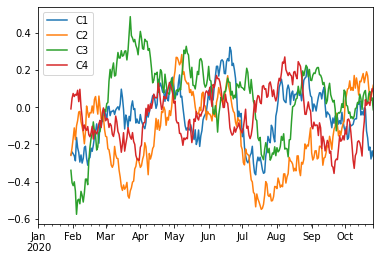

In [ ]:
#df.rolling(30).mean().plot()

### Matplotlib

In [ ]:
# matplotlib.cm 에서 Color map 찾아볼것

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
mpl.__version__

plt.style.use(['seaborn-notebook'])
fig = plt.figure() # 축과 그래프, 텍스트, 레이블을 표시하는 컨테이너
ax = plt.axes() #눈금과 레이블, 그래프 박스에 설정 
ax.set_xlim(-6,10)

plt.plot(np.random.randn(50).cumsum(),linestyle='solid') #linestyle='-', '--', '-.', ':', dashed, dashdot, dotted
plt.plot(np.random.randn(50).cumsum(),color=(0.2,0.4,0.6)) #skyblue, dodgerblue, magenta, 'b-', 'g--' 등등

plt.axis('tight'); #equal
plt.title('title')
plt.xlabel('x')
plt.ylabel('random.randn')
plt.legend(lines[:3],loc='upper center',frameon=False,ncol=2, 
           fancybox = True,framealpha=1,shadow=True,borderpad=1)

###폰트 설정
set([f.name for f in mpl.font_manager.fontManager.ttflist]) #폰트 관리자
font1 = {'family' : 'DejaVu','size':24,'color':'black'}
font2 = {'family' : 'Liberation Mono','size':18,'weight':'bold','color':'darkred'}

plt.title('title',fontdict=font1)
plt.xlabel('xlabel',fontdict=font2)

plt.imshow(I,cmap='Blues') #RdBu, 
plt.colorbar(extend='both');

###다중 플롯
ax1 = plt.axes()
ax2 = plt.axes([0.65,0.5,0.2,0.3])

fig.subplots_adjust(hspace=0.4,wspace=0.4)
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.text(0.5,0.5,str((3,3,i)), ha = 'center')

fig, ax = plt.subplots(3,3,sharex='col' or True,sharey='row' or True) #눈금 공유

#공간나누기
grid = plt.GridSpec(2,3,wspace=0.4,hspace=0.4)
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])

### 텍스트와 주석
ax.text(3,6,'. trangesData(3,6)',transform=ax.transData)
plt.annotate('interesting point',xy=(4,5),xytext=(20,10), arrowprops=dict(shrink=0.05)); #화살표로 가르키기
plt.annotate('incorrect value',(40,30),xytext = (50,40),arrowprops=dict(arrowstyle='->'))

### 눈금 맞춤
plt.axes(xscale='log',yscale='log');
ax = plt.gca()

ax1 = fig.add_subplot(2,2,1)
ax1.plot(x,y,'-y')
ax1.set_yscale('log')
ax1.set_title(r'Logarithmic plot of $ {10}^{x} $')
ax1.set_ylabel(r'$ {y} = {10}^{x} $')
plt.grid(b=True,which='both',axis='both')

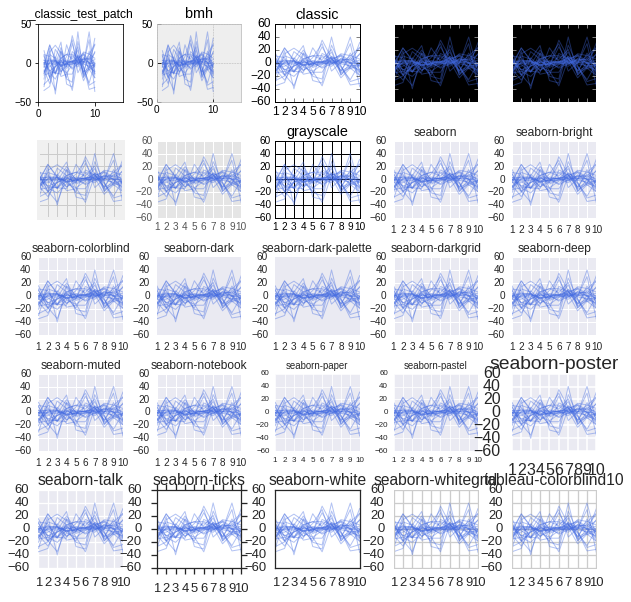

In [ ]:
### 스타일
fig = plt.figure(figsize=(10,10))
x = range(1,11)
columns = [np.random.randn(10) * i for i in range(1,26)]

for n, v in enumerate(plt.style.available[1:]):
  plt.style.use(v)
  plt.subplot(5,5,n+1)
  plt.title(v)

  for c in columns:
    plt.plot(x,c,marker='',color='royalblue',linewidth=1,alpha=0.4)
    plt.subplots_adjust(hspace=0.5,wspace=0.4)

plt.style.use(['seaborn-notebook'])

In [ ]:
### 막대 플롯
plt.bar(y_pos,height) #일반 막대
plt.xticks(y_pos,names,fontweight='bold') #x축 범주형(갯수, 이름) 

plt.barh(y_pos,height) #수평 막대
plt.yticks(y_pos,names,fontweight='bold')

bars = np.add(bars1,bars2).tolist()
plt.bar(r,bars1,color = 'royalblue',edgecolor='white') #누적 막대 그래프
plt.bar(r,bars2,bottom=bars1,color = 'skyblue',edgecolor='white')
plt.bar(r,bars3,bottom=bars2,color = 'lightblue',edgecolor='white')

plt.bar(r1,bars1,color = 'royalblue',width=bar_width,edgecolor='white',label='r1') #막대그래프 비교
plt.bar(r2,bars2,color = 'skyblue',width=bar_width,edgecolor='white',label='r2')
plt.bar(r3,bars3,color = 'lightblue',width=bar_width,edgecolor='white',label='r3')

### 스템 플롯
plt.stem(x,y,linefmt='gray',bottom=1,use_line_collection=True);

### 박스 플롯
ax.boxplot((r1,r2,r3,r4,r5))

### 산점도 그래프
markers = ['.',',','o','v','^','<','>','1','2','3','4','s','p','*','h','H','+','D','d','|','_']
plt.plot(np.random.randn(50),'o');
plt.scatter(x,y,c=colors,s=sizes,alpha=0.3,cmap='viridis')
plt.colorbar(); #옆에 컬러바

### x와 y의 일관성 차트
plt.subplots_adjust(wspace =1), dt = 0.01,t = np.arange(0,30,dt), n1 = np.random.randn(len(t)),n2 = np.random.randn(len(t)), r = np.exp(-t/0.05)
c1 = np.convolve(n1,r,mode='same') * dt, c2 = np.convolve(n2,r,mode='same') * dt
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + c1, s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + c2

plt.subplot(211), plt.plot(t,s1,t,s2), plt.xlim(0,5), plt.xlabel('time'), plt.ylabel('s1 & s2'), plt.grid(True)
plt.subplot(212), plt.cohere(s1,s2,256,1./dt), plt.ylabel('coherence'); #cohere 일관성

ax3.xcorr(z1,z2,usevlines=True,maxlags=None,normed=True,lw = 2) #xcorr

### 오차막대
plt.errorbar(x,y,yerr=dy,fmt='s',color='darkblue', ecolor='gray',elinewidth=2,capsize=0);

### 2차원 유사 플롯
plt.pcolor(np.random.rand(20,20),cmap='Reds'); #히트맵 느낌(?)

### 히스토그램, 구간화, 밀도
plt.hist(data,bins=50,alpha=0.5, histtype='stepfilled',color='steelblue', edgecolor='none'); 
x1 = np.random.normal(0,1,10000), x2 = np.random.normal(-5,3,10000)
d = dict(histtype='stepfilled',alpha=0.3,bins=50)
plt.hist(x1, **d), plt.hist(x2, **d); #한번에 여러 히스토그램 보기

plt.hist2d(x,y,bins=50,cmap='OrRd') #히트맵
plt.hexbin(x,y,gridsize=20,cmap='OrRd') #히트맵 6각형
plt.colorbar();

### 밀도와 등고선
a = np.arange(-1,1,0.1)
X,Y =np.meshgrid(a,a) # x,y 의 매트릭스 형태 생성
z = np.sin(X * Y)
CS = plt.contour(X,Y,z,levels=a,linewidth=2,cmap='Reds')
plt.clabel(CS,inline=2)
plt.colorbar();

plt.imshow(z,extent=[-1,1,-1,1],origin='lower',cmap='rainbow',alpha=0.4);

### 스트림 플롯
plt.streamplot(x,y,u,v); #방향성

### 화살표 2차원 필드
import sympy
x,y = sympy.symbols('x y')
f = x**2 + y**2 + x*y - sympy.sin(x) * 4
fdx = sympy.diff(f,x)
fdy = sympy.diff(f,y)
sample_size = 100
xs, ys = np.meshgrid(np.linspace(-10,10,sample_size),np.linspace(-10,10,sample_size))
zs = [float(f.subs(x,xv).subs(y,yv)) for xv, yv in zip(xs.ravel(),ys.ravel())]
zs = np.array(zs).reshape(sample_size,sample_size)
plt.contour(xs,ys,zs,40,level=np.logspace(-0.5,2.0,40) ,cmap='rainbow')
xs_q, ys_q = np.meshgrid(np.linspace(-10,10,10),np.linspace(-10,10,10))
xsg = [ -float(fdx.subs(x,xv).subs(y,yv)) for xv,yv in zip(xs_q.ravel(), ys_q.ravel())]
ysg = [ -float(fdy.subs(x,xv).subs(y,yv)) for xv,yv in zip(xs_q.ravel(), ys_q.ravel())]
plt.quiver(xs_q,ys_q,xsg,width=0.005,scale=500,color='black'); 

### 파이차트
plt.pie(data,explode=explode , #튀어나오게 하는 파라미터
        labels=categories,autopct = '%0.01f%%')

### 레이더 차트
df = pd.DataFrame({
    'group': ['A','B','C','D'],
    'var1': [38,1.5,30,4],
    'var2': [29,10,9,34],
    'var3': [8,39,23,24],
    'var4': [7,31,33,14],
    'var5': [28,15,32,14],    
})
categories = list(df)[1:]
N =len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111,polar=True)
ax.set_theta_offset(np.pi /2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
plt.xticks(angles[:-1], categories)
plt.yticks([10,20,30],['10','20','30'],color='gray',size=7)
plt.ylim(0,40)
values = df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles,values,linewidth=1,linestyle='solid',label='A')
ax.fill(angles,values,'b',alpha=0.1)
values = df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles,values,linewidth=1,linestyle='solid',label='B')
ax.fill(angles,values,'r',alpha=0.1)
plt.legend(bbox_to_anchor=(0.1,0.1));

### 생키다이어그램 
from matplotlib.sankey import Sankey
Sankey(flows=[0.20,0.15,0.25,-0.25,-0.25,-0.15,-0.60,-0.20],
       labels=['Zero','One','Two','Three','Four','Five','Six','Seven'],
       orientations=[-1,-1,0,1,1,1,0,-1]).finish();

#3차원 플로팅
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
x = range(1,101)
y = np.random.randn(100) * x
z = np.random.randn(100) * x
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,c='green',s=60);

zline = np.linspace(0,20,1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline,yline,zline,'gray') #선

ax = plt.axes(projection='3d')
ax.contour3D(x,y,z,50,cmap='BuPu')
ax.view_init(60,30) # 보는 시각 변경

ax.plot_wireframe(x,y,z,color='green'); #그물망 표현
ax.plot_surface(x,y,z,rstride=1,cstride=1, cmap='viridis',edgecolor='none');

### Seaborn

### Plotly

### Folium

### Bokeh